# Principal Component Analysis

### 1. PCA on 2-D Data Points

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
import matplotlib.cm as cm

In [2]:
datafile = 'data/ex7data1.mat'
data = scipy.io.loadmat(datafile)
data.keys()

dict_keys(['__globals__', '__header__', '__version__', 'X'])

In [3]:
X = data['X']

In [4]:
X.shape

(50, 2)

In [5]:
def plotData(X, title):
    plt.figure(figsize=(7,5))
    plt.scatter(X[:,0], X[:,1], s=15, facecolors='none', edgecolors='g')
    plt.title(title,fontsize=18)
    plt.grid(True)

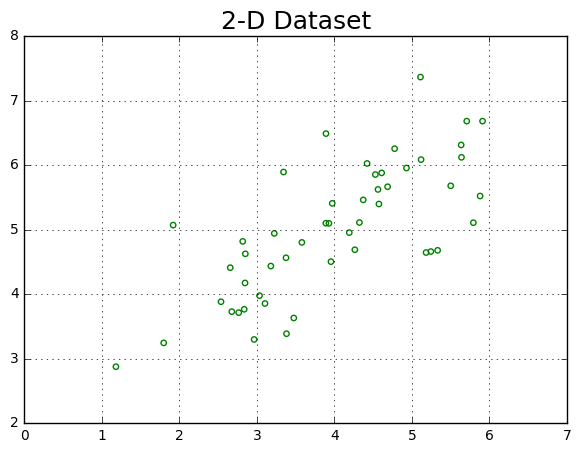

In [6]:
plotData(X, "2-D Dataset")

In [7]:
def normalizeData(X):
    mean = np.mean(X, axis=0)
    mean = mean.reshape(1, X.shape[1])
    std = np.std(X, axis=0)
    std = std.reshape(1, X.shape[1])
    return (X-mean)/std

In [8]:
X = normalizeData(X)

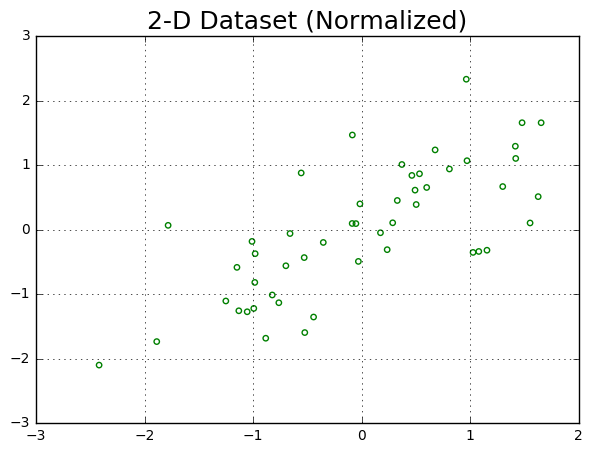

In [9]:
plotData(X, "2-D Dataset (Normalized)")

In [10]:
def covariance(X):
    m = X.shape[0]
    return X.T.dot(X)/m

In [11]:
cov = covariance(X)

In [12]:
cov.shape

(2, 2)

In [13]:
U, S, V = np.linalg.svd(cov)

In [14]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [15]:
def projectData(X, U, K):
    return X.dot(U[:,:K])

In [16]:
K = 1 # the number of principal features
Z = projectData(X, U, K)

In [17]:
Z[0]

array([ 1.49631261])

In [18]:
def recoverData(Z, U, K):
    return Z.dot(U[:,:K].T)

In [19]:
X_rec  = recoverData(Z, U, K)

In [20]:
X_rec[0]

array([-1.05805279, -1.05805279])

In [21]:
def plotProjection(X, X_rec, title):
    plt.figure(figsize=(7,5))
    plt.scatter(X[:,0], X[:,1], s=15, facecolors='none', edgecolors='g', label='Original data')
    plt.scatter(X_rec[:,0], X_rec[:,1], s=15, facecolors='none', edgecolors='r', label='Projected data')
    plt.xlabel('Normalized Feature 1')
    plt.ylabel('Normalized Feature 2')
    plt.legend(loc=4)
    plt.title(title,fontsize=18)
    plt.grid(True)
    
    for i in range(X.shape[0]):
        plt.plot([X[i,0], X_rec[i,0]], [X[i,1], X_rec[i,1]], 'k--')

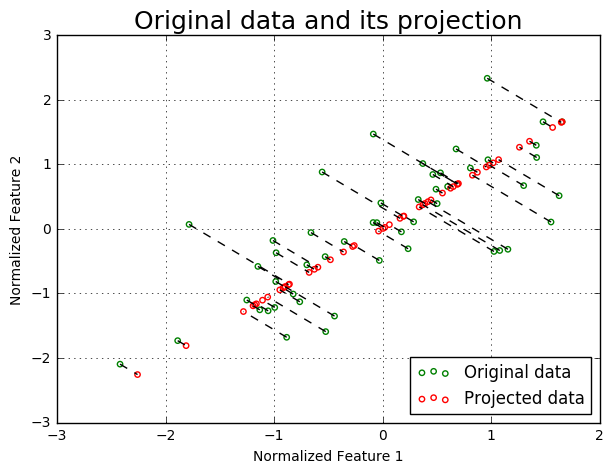

In [22]:
plotProjection(X, X_rec, "Original data and its projection")

### 2. Face Image Dataset

In [23]:
datafile = 'data/ex7faces.mat'
data = scipy.io.loadmat(datafile)
data.keys()

dict_keys(['__globals__', '__header__', '__version__', 'X'])

In [24]:
X = data['X']
X.shape

(5000, 1024)

In [25]:
def displayImages(X, row, col):
    width = 32
    height = 32
    fov = np.zeros((height*row,width*col))
    num = 0
    for i in range(row):
        for j in range(col):
            img_cur = X[num].reshape([width,height])
            fov[height*i:height*(i+1),width*j:width*(j+1)] = img_cur.T
            num = num+1
    fig = plt.figure(figsize=(10,10))
    display = scipy.misc.toimage(fov)
    plt.imshow(display, cmap = cm.Greys_r)

** Display the original face images **

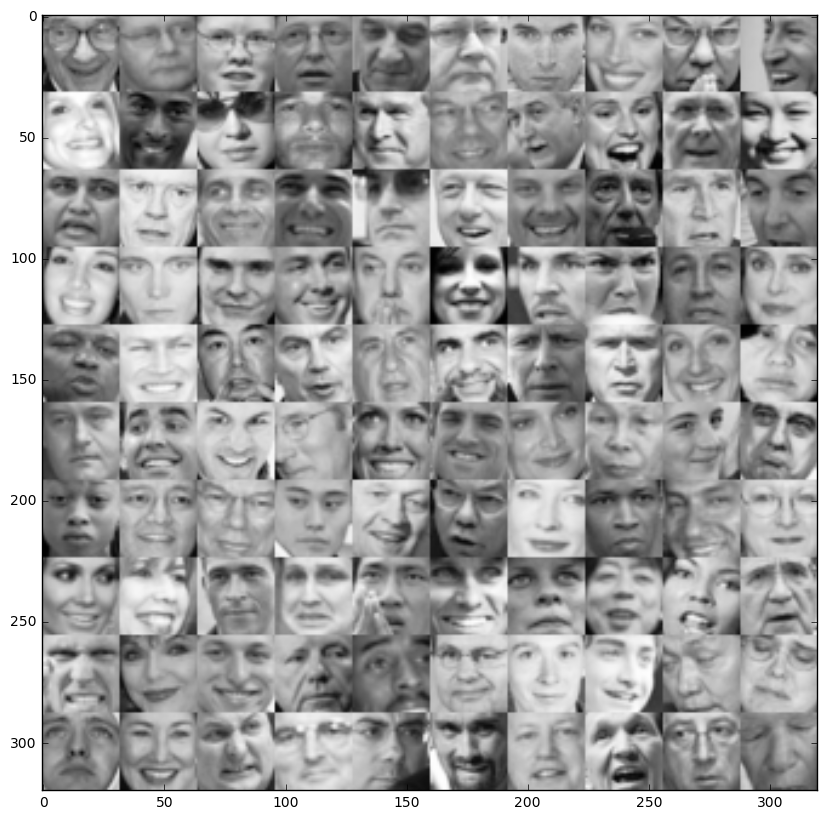

In [26]:
displayImages(X, 10, 10)

In [27]:
X_norm = normalizeData(X)
X_norm.shape

(5000, 1024)

In [28]:
cov = covariance(X_norm)
cov.shape

(1024, 1024)

In [29]:
U, S, V = np.linalg.svd(cov)
U.shape

(1024, 1024)

** Display the first 36 principal components **

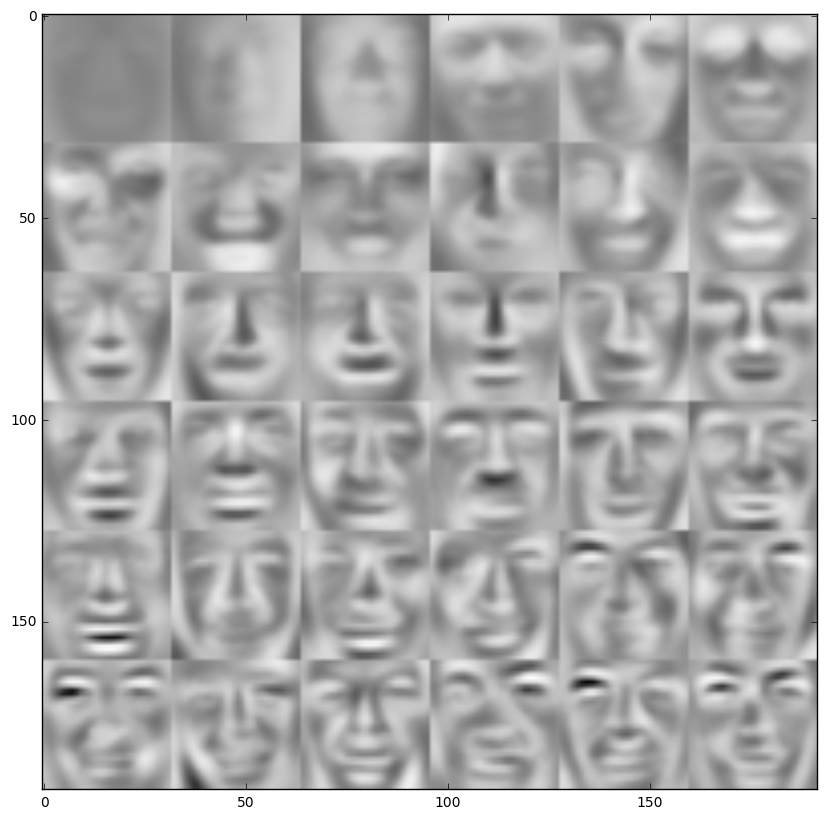

In [30]:
# Display the first 36 principal components
displayImages(U[:,:36].T, 6, 6)

** Reconstructed from only the top 100 principal components **

In [31]:
K = 100 # the number of principal features
Z = projectData(X, U, K)
X_rec  = recoverData(Z, U, K)

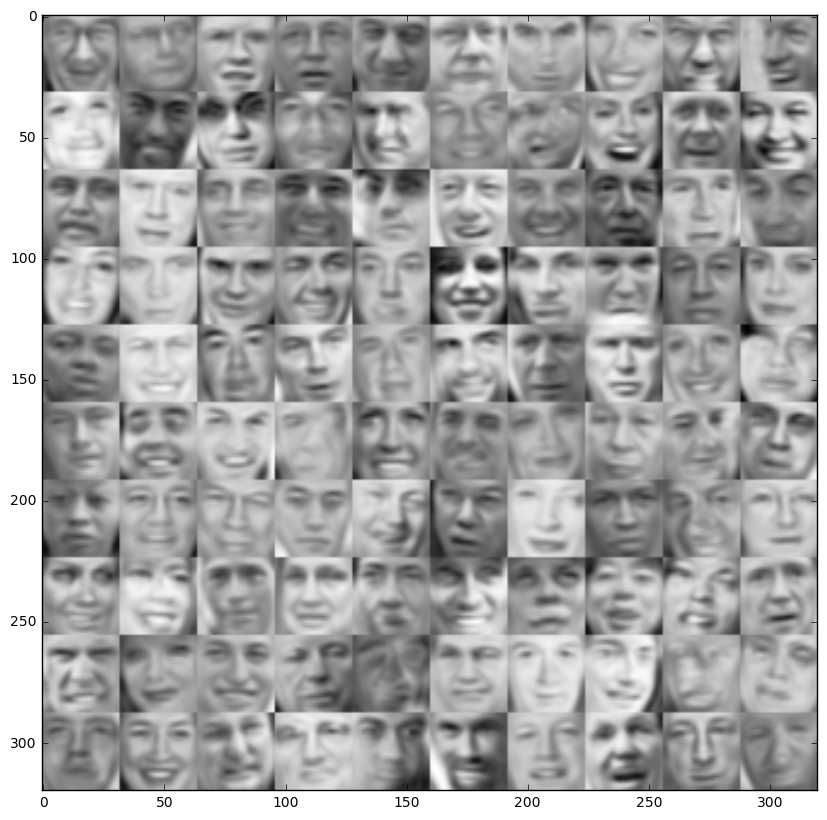

In [32]:
displayImages(X_rec, 10, 10)